# Labelling Clusters By Most Common Words

This tutorial will show you how to label your clusters with the most occurring words

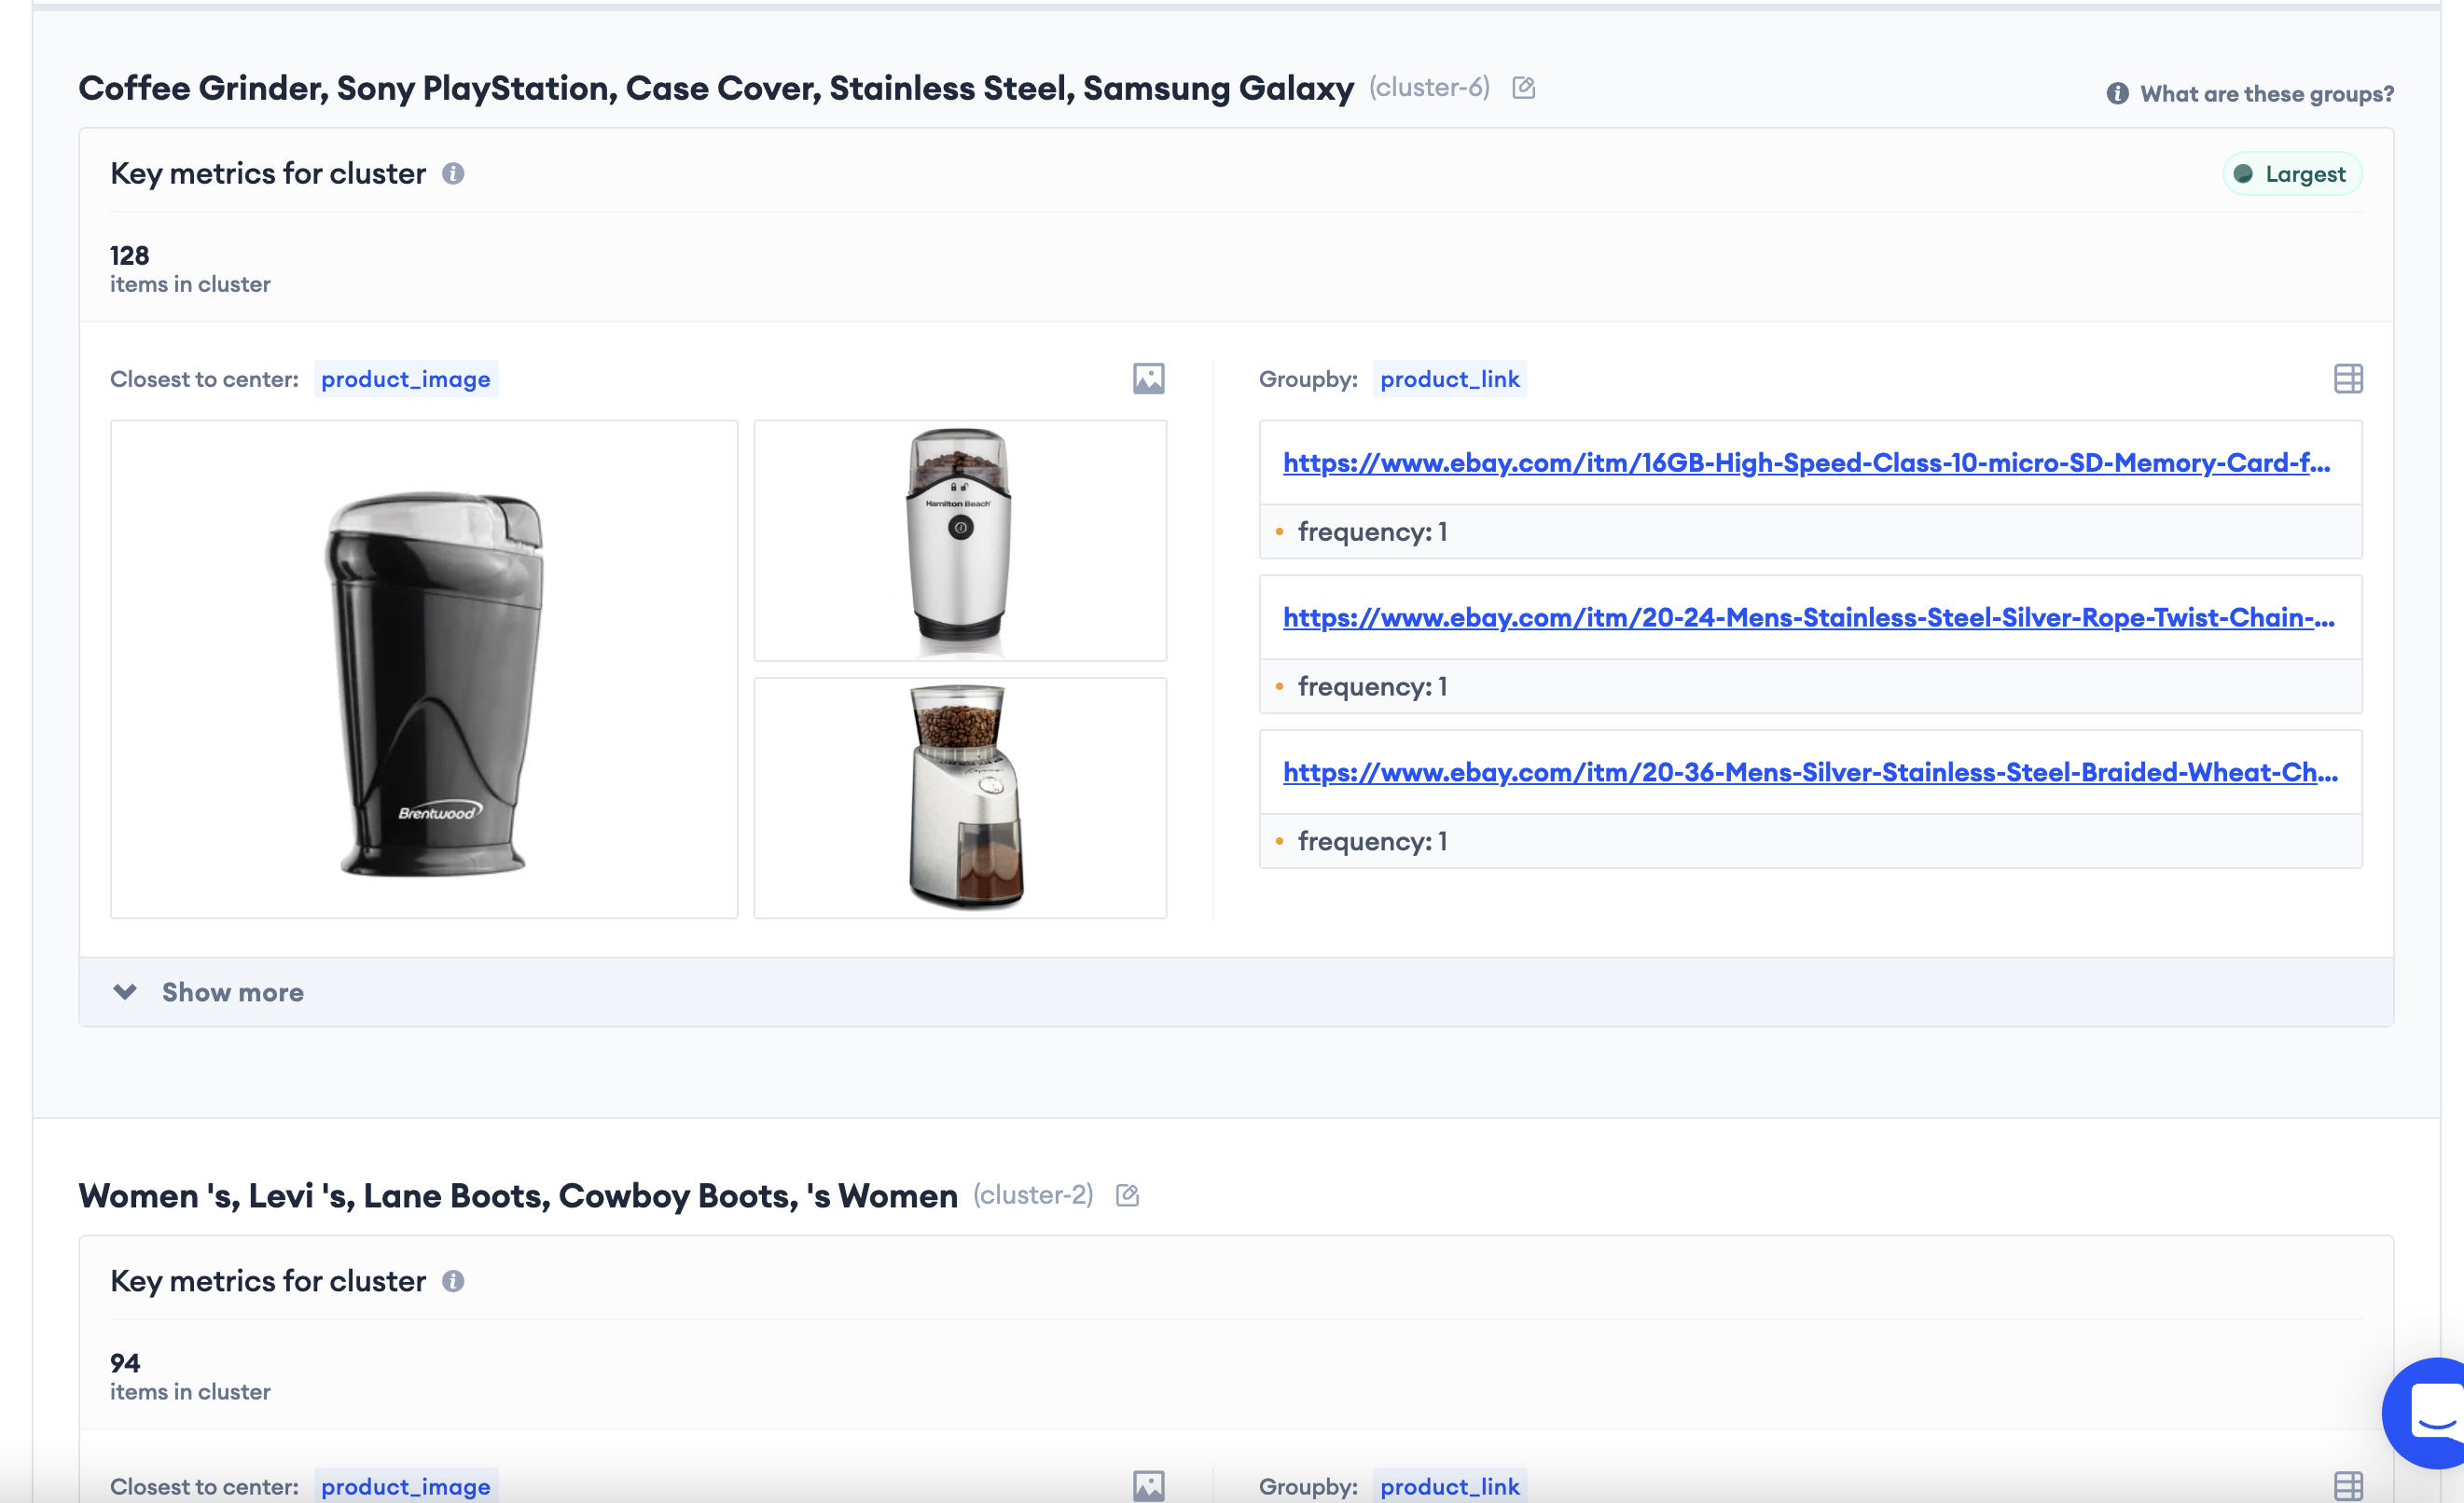

# Installation 

In [ ]:
!pip install -q RelevanceAi-Dev
!pip install -q rake-nltk

# Inputs

This workflow requires users to: 
- Have run a clustering workflow 
- Retrieve the Deployable ID
- Text field 

In [ ]:
from relevanceai import Client
client = Client()

In [18]:
dataset_id = "quickstart_auto_clustering_kmeans"
deployable_id = "zZoDb38B8_iiYmskiDAj"
vector_fields = ["product_title_clip_vector_"]
text_fields = ["product_title"]
alias = "kmeans-10"
most_common: int = 5

# Run the rest of the code and get free auto-labelling

In [9]:
ds = client.Dataset(dataset_id)
configuration = ds.deployables.get(deployable_id=deployable_id)
keyphrases = ds.cluster_keyphrases(
  vector_fields=vector_fields, 
  text_fields=text_fields, 
  cluster_alias=alias, 
  most_common=most_common, 
  algorithm="nltk", # can be one of nltk or nltk-rake
  n=2, # number of co-occurring words to use
  preprocess_hooks=[] # A list of functions to parse in a string to clean
)

# Example of preprocess hook: 
# def lower_string(string):
# return string.lower()
# def remove_words(string):
#   return string.replace("boots", "")
# You can chain a number of these to allow you to infinitely clean your titles

cluster_update = {}
for k, values in keyphrases.items():
  cluster_update[k] = ", ".join([v[0] for v in values])
cluster_update

In [ ]:
configuration['cluster-labels'] = cluster_update
ds.deployables.update(deployable_id=deployable_id, dataset_id=dataset_id, configuration=configuration)